In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#load the team related datasets into the notebook and save them as dataframes
def country_df(csv):
  df = pd.read_csv(csv)
  df.sort_values('HomeTeam', inplace=True)
  df.reset_index(inplace=True)
  df.drop("index", axis =1 , inplace=True)

  return df

df_france = country_df('FootballData/F1.csv')
df_spain  = country_df('FootballData/SP1.csv')
df_england  = country_df('FootballData/E0.csv')
df_championship  = country_df('FootballData/E1.csv')
#df_finland  = country_df('/content/drive/MyDrive/FootballData/FIN.csv')
#df_germany = country_df('FootballData/D1.csv')
df_england_22 = country_df('FootballData/E0_22.csv')
df_spa_22 = country_df('FootballData/SP1_22.csv')
#df_jpn = country_df('FootballData/JPN.csv')
df_ita = country_df('FootballData/I1.csv')
df_E1 = country_df('FootballData/E1.csv')
df_E2 = country_df('FootballData/E2.csv')
df_E3 = country_df('FootballData/E3.csv')
df_EC = country_df('FootballData/EC.csv')
df_F2 = country_df('FootballData/F2.csv')
df_I2 = country_df('FootballData/I2.csv')
df_dataE0 = country_df('FootballData/data (9)/E0.csv')
df_dataE1 = country_df('FootballData/data (9)/E1.csv')
df_dataE2 = country_df('FootballData/data (9)/E2.csv')
df_dataE3 = country_df('FootballData/data (9)/E3.csv')
df_dataEC = country_df('FootballData/data (9)/EC.csv')
df_dataF2 = country_df('FootballData/data (9)/F2.csv')
df_dataG1 = country_df('FootballData/data (9)/G1.csv')
df_dataN1 = country_df('FootballData/data (9)/N1.csv')
df_dataP1 = country_df('FootballData/data (9)/P1.csv')
df_dataSC0 = country_df('FootballData/data (9)/SC0.csv')
df_dataSC1 = country_df('FootballData/data (9)/SC1.csv')
df_dataSC2 = country_df('FootballData/data (9)/SC2.csv')
df_dataSC3 = country_df('FootballData/data (9)/SC3.csv')
df_dataSP2 = country_df('FootballData/data (9)/SP2.csv')
df_dataSP1 = country_df('FootballData/data (9)/SP1.csv')
df_dataT1 = country_df('FootballData/data (9)/T1.csv')

df_data8E0 = country_df('FootballData/data (8)/E0.csv')
df_data8E1 = country_df('FootballData/data (8)/E1.csv')
df_data8E2 = country_df('FootballData/data (8)/E2.csv')
df_data8E3 = country_df('FootballData/data (8)/E3.csv')
df_data8EC = country_df('FootballData/data (8)/EC.csv')
#df_data8F2 = country_df('FootballData/data (8)/F2.csv')
df_data8G1 = country_df('FootballData/data (8)/G1.csv')
#df_data8N1 = country_df('FootballData/data (8)/N1.csv')
#df_data8P1 = country_df('FootballData/data (8)/P1.csv')
df_data8SC0 = country_df('FootballData/data (8)/SC0.csv')
df_data8SC1 = country_df('FootballData/data (8)/SC1.csv')
df_data8SC2 = country_df('FootballData/data (8)/SC2.csv')
df_data8SC3 = country_df('FootballData/data (8)/SC3.csv')
#df_data8SP2 = country_df('FootballData/data (8)/SP2.csv')
df_data8SP1 = country_df('FootballData/data (8)/SP1.csv')
df_data8T1 = country_df('FootballData/data (8)/T1.csv')
df_B1 = country_df('FootballData/B1.csv')



data = pd.concat([df_france, df_spain, df_england, df_championship, df_england_22, df_spa_22, df_ita,df_E1,df_E2,df_E3,df_EC,df_F2,df_I2,df_dataE0,df_dataE1,df_dataE2,df_dataE3,df_dataEC,df_dataF2,df_dataG1,df_dataN1,df_dataP1,df_dataSC0,df_dataSC1,df_dataSC2,df_dataSC3,df_dataSP1,df_dataSP2,df_dataT1,
                  df_data8E0,df_data8E1,df_data8E2,df_data8E3,df_data8EC,df_data8G1,df_data8SC0,df_data8SC1,df_data8SC2,df_data8SC3,df_data8SP1,df_data8T1], sort = False)




In [2]:
data.shape

(15744, 139)

In [3]:
data.isna().sum()

Div             0
Date            0
HomeTeam        0
AwayTeam        0
FTHG            0
            ...  
AvgCAHH     14984
AvgCAHA     14984
BSH          5823
BSD          5823
BSA          5823
Length: 139, dtype: int64

In [4]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HY,AY,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BSH,BSD,BSA
count,15744.000000,15744.000000,15743.000000,15743.000000,11327.000000,11327.000000,11327.000000,11327.000000,11342.000000,11342.000000,...,759.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,9921.000000,9921.000000,9921.000000
mean,1.437500,1.100356,0.643079,0.479896,12.011654,9.577911,5.742827,4.544010,1.448774,1.818815,...,1.957036,1.962368,1.967145,2.021408,2.027342,1.936118,1.940961,2.287810,3.413472,3.787174
std,1.219339,1.066113,0.803825,0.689384,4.622596,4.110183,2.974402,2.615035,1.250896,1.364154,...,0.099912,0.104936,0.104870,0.104814,0.109980,0.094286,0.093737,0.989092,0.486010,2.086802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.580000,1.710000,1.610000,1.810000,1.650000,1.730000,1.600000,1.080000,2.620000,1.050000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,4.000000,3.000000,0.000000,1.000000,...,1.880000,1.880000,1.880000,1.940000,1.940000,1.860000,1.860000,1.730000,3.250000,2.600000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,9.000000,5.000000,4.000000,1.000000,2.000000,...,1.960000,1.960000,1.960000,2.015000,2.020000,1.935000,1.940000,2.100000,3.250000,3.200000
75%,2.000000,2.000000,1.000000,1.000000,15.000000,12.000000,7.000000,6.000000,2.000000,3.000000,...,2.040000,2.040000,2.050000,2.102500,2.110000,2.010000,2.020000,2.500000,3.500000,4.330000
max,9.000000,9.000000,6.000000,5.000000,44.000000,33.000000,24.000000,18.000000,8.000000,9.000000,...,2.200000,2.480000,2.270000,2.520000,2.310000,2.420000,2.200000,23.000000,9.000000,23.000000


In [5]:
data = data[["FTHG","FTAG","B365H","B365D","B365A","FTR"]]

In [6]:
data['FTR'] = data['FTR'].map({'H':0,'D':1,'A':2})

In [7]:
data.shape

(15744, 6)

In [8]:
data.head()

,FTHG,FTAG,B365H,B365D,B365A,FTR
0,1,3,5.0,3.30,1.61,2
1,1,0,3.0,2.87,2.30,0
2,1,0,2.2,2.75,3.40,0
3,0,0,1.9,2.87,4.20,1
4,3,1,2.4,3.00,2.70,0


In [9]:
# Create a boolean mask for rows with NaN values
mask = data.isnull().any(axis=1)

# Delete rows using the mask
data = data[~mask]

In [10]:
X = data.iloc[:, 0:5]
y=data["FTR"].values

In [11]:
X.shape

(15717, 5)

In [12]:
y.shape

(15717,)

In [13]:
#from sklearn.preprocessing import StandardScaler
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [14]:
# Split the data to train and test dataset.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
import torch

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("xtrain:", X_train.shape)
print("ytrain:", X_test.shape)


y_train: torch.Size([12573])
y_test: torch.Size([3144])
xtrain: torch.Size([12573, 5])
ytrain: torch.Size([3144, 5])


In [17]:
y.shape

(15717,)

In [18]:
import torch
import torch.nn as nn
 
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.hidden = nn.Linear(input_dim, 5)
        self.hidden1 = nn.Linear(5, 100)
        self.act = nn.ReLU()
        self.output = nn.Linear(100, output_dim)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.act(self.hidden1(x))
        x = self.output(x)
        x =  self.softmax(x)
        return x

In [19]:
input_dim  = 5
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [20]:
import torch.optim as optim
 
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
import copy
import tqdm
import numpy as np

n_epochs = 100
batch_size =700
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred) == torch.argmax(y_batch)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred) == torch.argmax(y_test)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce}, Accuracy={acc}")
    
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 17/17 [00:00<00:00, 60.45batch/s, acc=0, loss=1.06]


Epoch 0 validation: Cross-entropy=1.0544840097427368, Accuracy=0.0


Epoch 1: 100%|██████████| 17/17 [00:00<00:00, 55.03batch/s, acc=0, loss=1.04]


Epoch 1 validation: Cross-entropy=1.0273551940917969, Accuracy=0.0


Epoch 2: 100%|██████████| 17/17 [00:00<00:00, 39.10batch/s, acc=0, loss=1.01] 


Epoch 2 validation: Cross-entropy=0.9982976317405701, Accuracy=0.0


Epoch 3: 100%|██████████| 17/17 [00:00<00:00, 46.58batch/s, acc=0, loss=0.974]


Epoch 3 validation: Cross-entropy=0.9605935215950012, Accuracy=0.0


Epoch 4: 100%|██████████| 17/17 [00:00<00:00, 69.75batch/s, acc=0, loss=0.922]


Epoch 4 validation: Cross-entropy=0.9112259149551392, Accuracy=0.0


Epoch 5: 100%|██████████| 17/17 [00:00<00:00, 64.58batch/s, acc=0, loss=0.864]


Epoch 5 validation: Cross-entropy=0.8600977659225464, Accuracy=0.0


Epoch 6: 100%|██████████| 17/17 [00:00<00:00, 65.15batch/s, acc=0, loss=0.819]


Epoch 6 validation: Cross-entropy=0.8184309601783752, Accuracy=0.0


Epoch 7: 100%|██████████| 17/17 [00:00<00:00, 68.85batch/s, acc=0, loss=0.78] 


Epoch 7 validation: Cross-entropy=0.7778699398040771, Accuracy=0.0


Epoch 8: 100%|██████████| 17/17 [00:00<00:00, 71.02batch/s, acc=0, loss=0.737]


Epoch 8 validation: Cross-entropy=0.7349658012390137, Accuracy=0.0


Epoch 9: 100%|██████████| 17/17 [00:00<00:00, 66.16batch/s, acc=0, loss=0.693]


Epoch 9 validation: Cross-entropy=0.6915055513381958, Accuracy=0.0


Epoch 10: 100%|██████████| 17/17 [00:00<00:00, 46.22batch/s, acc=0, loss=0.652]


Epoch 10 validation: Cross-entropy=0.651845395565033, Accuracy=0.0


Epoch 11: 100%|██████████| 17/17 [00:00<00:00, 64.89batch/s, acc=0, loss=0.62] 


Epoch 11 validation: Cross-entropy=0.620287299156189, Accuracy=0.0


Epoch 12: 100%|██████████| 17/17 [00:00<00:00, 57.99batch/s, acc=0, loss=0.598]


Epoch 12 validation: Cross-entropy=0.5984842777252197, Accuracy=0.0


Epoch 13: 100%|██████████| 17/17 [00:00<00:00, 58.37batch/s, acc=0, loss=0.584]


Epoch 13 validation: Cross-entropy=0.5845290422439575, Accuracy=0.0


Epoch 14: 100%|██████████| 17/17 [00:00<00:00, 60.91batch/s, acc=0, loss=0.575]


Epoch 14 validation: Cross-entropy=0.5756420493125916, Accuracy=0.0


Epoch 15: 100%|██████████| 17/17 [00:00<00:00, 57.05batch/s, acc=0, loss=0.57] 


Epoch 15 validation: Cross-entropy=0.569796085357666, Accuracy=0.0


Epoch 16: 100%|██████████| 17/17 [00:00<00:00, 60.77batch/s, acc=0, loss=0.566]


Epoch 16 validation: Cross-entropy=0.5658246278762817, Accuracy=0.0


Epoch 17: 100%|██████████| 17/17 [00:00<00:00, 46.21batch/s, acc=0, loss=0.563]


Epoch 17 validation: Cross-entropy=0.5630227327346802, Accuracy=0.0


Epoch 18: 100%|██████████| 17/17 [00:00<00:00, 57.24batch/s, acc=0, loss=0.561]


Epoch 18 validation: Cross-entropy=0.5609821081161499, Accuracy=0.0


Epoch 19: 100%|██████████| 17/17 [00:00<00:00, 69.19batch/s, acc=0, loss=0.56] 


Epoch 19 validation: Cross-entropy=0.5594449639320374, Accuracy=0.0


Epoch 20: 100%|██████████| 17/17 [00:00<00:00, 64.70batch/s, acc=0, loss=0.558]


Epoch 20 validation: Cross-entropy=0.5582581162452698, Accuracy=0.0


Epoch 21: 100%|██████████| 17/17 [00:00<00:00, 54.99batch/s, acc=0, loss=0.557]


Epoch 21 validation: Cross-entropy=0.557322084903717, Accuracy=0.0


Epoch 22: 100%|██████████| 17/17 [00:00<00:00, 63.09batch/s, acc=0, loss=0.557]


Epoch 22 validation: Cross-entropy=0.5565692782402039, Accuracy=0.0


Epoch 23: 100%|██████████| 17/17 [00:00<00:00, 60.85batch/s, acc=0, loss=0.556]


Epoch 23 validation: Cross-entropy=0.5559531450271606, Accuracy=0.0


Epoch 24: 100%|██████████| 17/17 [00:00<00:00, 39.11batch/s, acc=0, loss=0.556]


Epoch 24 validation: Cross-entropy=0.555442214012146, Accuracy=0.0


Epoch 25: 100%|██████████| 17/17 [00:00<00:00, 55.91batch/s, acc=0, loss=0.555]


Epoch 25 validation: Cross-entropy=0.5550128817558289, Accuracy=0.0


Epoch 26: 100%|██████████| 17/17 [00:00<00:00, 73.77batch/s, acc=0, loss=0.555]


Epoch 26 validation: Cross-entropy=0.5546502470970154, Accuracy=0.0


Epoch 27: 100%|██████████| 17/17 [00:00<00:00, 53.84batch/s, acc=0, loss=0.554]


Epoch 27 validation: Cross-entropy=0.554343044757843, Accuracy=0.0


Epoch 28: 100%|██████████| 17/17 [00:00<00:00, 55.24batch/s, acc=0, loss=0.554]


Epoch 28 validation: Cross-entropy=0.5540806651115417, Accuracy=0.0


Epoch 29: 100%|██████████| 17/17 [00:00<00:00, 61.84batch/s, acc=0, loss=0.554]


Epoch 29 validation: Cross-entropy=0.5538547039031982, Accuracy=0.0


Epoch 30: 100%|██████████| 17/17 [00:00<00:00, 65.56batch/s, acc=0, loss=0.554]


Epoch 30 validation: Cross-entropy=0.5536587834358215, Accuracy=0.0


Epoch 31: 100%|██████████| 17/17 [00:00<00:00, 46.14batch/s, acc=0, loss=0.553]


Epoch 31 validation: Cross-entropy=0.5534876585006714, Accuracy=0.0


Epoch 32: 100%|██████████| 17/17 [00:00<00:00, 63.46batch/s, acc=0, loss=0.553]


Epoch 32 validation: Cross-entropy=0.5533366799354553, Accuracy=0.0


Epoch 33: 100%|██████████| 17/17 [00:00<00:00, 56.73batch/s, acc=0, loss=0.553]


Epoch 33 validation: Cross-entropy=0.5532033443450928, Accuracy=0.0


Epoch 34: 100%|██████████| 17/17 [00:00<00:00, 56.88batch/s, acc=0, loss=0.553]


Epoch 34 validation: Cross-entropy=0.5530857443809509, Accuracy=0.0


Epoch 35: 100%|██████████| 17/17 [00:00<00:00, 58.48batch/s, acc=0, loss=0.553]


Epoch 35 validation: Cross-entropy=0.5529797077178955, Accuracy=0.0


Epoch 36: 100%|██████████| 17/17 [00:00<00:00, 62.18batch/s, acc=0, loss=0.553]


Epoch 36 validation: Cross-entropy=0.5528844594955444, Accuracy=0.0


Epoch 37: 100%|██████████| 17/17 [00:00<00:00, 63.12batch/s, acc=0, loss=0.553]


Epoch 37 validation: Cross-entropy=0.5527983903884888, Accuracy=0.0


Epoch 38: 100%|██████████| 17/17 [00:00<00:00, 41.39batch/s, acc=0, loss=0.553]


Epoch 38 validation: Cross-entropy=0.5527200102806091, Accuracy=0.0


Epoch 39: 100%|██████████| 17/17 [00:00<00:00, 59.46batch/s, acc=0, loss=0.553]


Epoch 39 validation: Cross-entropy=0.5526483654975891, Accuracy=0.0


Epoch 40: 100%|██████████| 17/17 [00:00<00:00, 56.40batch/s, acc=0, loss=0.553]


Epoch 40 validation: Cross-entropy=0.5525843501091003, Accuracy=0.0


Epoch 41: 100%|██████████| 17/17 [00:00<00:00, 54.59batch/s, acc=0, loss=0.552]


Epoch 41 validation: Cross-entropy=0.5525246262550354, Accuracy=0.0


Epoch 42: 100%|██████████| 17/17 [00:00<00:00, 66.94batch/s, acc=0, loss=0.552]


Epoch 42 validation: Cross-entropy=0.5524696707725525, Accuracy=0.0


Epoch 43: 100%|██████████| 17/17 [00:00<00:00, 78.63batch/s, acc=0, loss=0.552]


Epoch 43 validation: Cross-entropy=0.552418053150177, Accuracy=0.0


Epoch 44: 100%|██████████| 17/17 [00:00<00:00, 72.55batch/s, acc=0, loss=0.552]


Epoch 44 validation: Cross-entropy=0.5523720383644104, Accuracy=0.0


Epoch 45: 100%|██████████| 17/17 [00:00<00:00, 88.08batch/s, acc=0, loss=0.552]


Epoch 45 validation: Cross-entropy=0.5523287057876587, Accuracy=0.0


Epoch 46: 100%|██████████| 17/17 [00:00<00:00, 43.61batch/s, acc=0, loss=0.552]


Epoch 46 validation: Cross-entropy=0.5522873401641846, Accuracy=0.0


Epoch 47: 100%|██████████| 17/17 [00:00<00:00, 65.02batch/s, acc=0, loss=0.552]


Epoch 47 validation: Cross-entropy=0.5522507429122925, Accuracy=0.0


Epoch 48: 100%|██████████| 17/17 [00:00<00:00, 59.38batch/s, acc=0, loss=0.552]


Epoch 48 validation: Cross-entropy=0.5522156357765198, Accuracy=0.0


Epoch 49: 100%|██████████| 17/17 [00:00<00:00, 63.92batch/s, acc=0, loss=0.552]


Epoch 49 validation: Cross-entropy=0.5521825551986694, Accuracy=0.0


Epoch 50: 100%|██████████| 17/17 [00:00<00:00, 58.15batch/s, acc=0, loss=0.552]


Epoch 50 validation: Cross-entropy=0.552152156829834, Accuracy=0.0


Epoch 51: 100%|██████████| 17/17 [00:00<00:00, 52.33batch/s, acc=0, loss=0.552]


Epoch 51 validation: Cross-entropy=0.5521236658096313, Accuracy=0.0


Epoch 52: 100%|██████████| 17/17 [00:00<00:00, 42.46batch/s, acc=0, loss=0.552]


Epoch 52 validation: Cross-entropy=0.5520965456962585, Accuracy=0.0


Epoch 53: 100%|██████████| 17/17 [00:00<00:00, 60.25batch/s, acc=0, loss=0.552]


Epoch 53 validation: Cross-entropy=0.5520713925361633, Accuracy=0.0


Epoch 54: 100%|██████████| 17/17 [00:00<00:00, 66.22batch/s, acc=0, loss=0.552]


Epoch 54 validation: Cross-entropy=0.5520474314689636, Accuracy=0.0


Epoch 55: 100%|██████████| 17/17 [00:00<00:00, 65.37batch/s, acc=0, loss=0.552]


Epoch 55 validation: Cross-entropy=0.5520250797271729, Accuracy=0.0


Epoch 56: 100%|██████████| 17/17 [00:00<00:00, 64.13batch/s, acc=0, loss=0.552]


Epoch 56 validation: Cross-entropy=0.5520040392875671, Accuracy=0.0


Epoch 57: 100%|██████████| 17/17 [00:00<00:00, 58.80batch/s, acc=0, loss=0.552]


Epoch 57 validation: Cross-entropy=0.5519838333129883, Accuracy=0.0


Epoch 58: 100%|██████████| 17/17 [00:00<00:00, 44.50batch/s, acc=0, loss=0.552]


Epoch 58 validation: Cross-entropy=0.5519648194313049, Accuracy=0.0


Epoch 59: 100%|██████████| 17/17 [00:00<00:00, 52.24batch/s, acc=0, loss=0.552]


Epoch 59 validation: Cross-entropy=0.5519470572471619, Accuracy=0.0


Epoch 60: 100%|██████████| 17/17 [00:00<00:00, 57.18batch/s, acc=0, loss=0.552]


Epoch 60 validation: Cross-entropy=0.5519299507141113, Accuracy=0.0


Epoch 61: 100%|██████████| 17/17 [00:00<00:00, 57.97batch/s, acc=0, loss=0.552]


Epoch 61 validation: Cross-entropy=0.5519135594367981, Accuracy=0.0


Epoch 62: 100%|██████████| 17/17 [00:00<00:00, 53.25batch/s, acc=0, loss=0.552]


Epoch 62 validation: Cross-entropy=0.5518984794616699, Accuracy=0.0


Epoch 63: 100%|██████████| 17/17 [00:00<00:00, 60.20batch/s, acc=0, loss=0.552]


Epoch 63 validation: Cross-entropy=0.5518836379051208, Accuracy=0.0


Epoch 64: 100%|██████████| 17/17 [00:00<00:00, 58.41batch/s, acc=0, loss=0.552]


Epoch 64 validation: Cross-entropy=0.5518704056739807, Accuracy=0.0


Epoch 65: 100%|██████████| 17/17 [00:00<00:00, 43.55batch/s, acc=0, loss=0.552]


Epoch 65 validation: Cross-entropy=0.5518566966056824, Accuracy=0.0


Epoch 66: 100%|██████████| 17/17 [00:00<00:00, 62.18batch/s, acc=0, loss=0.552]


Epoch 66 validation: Cross-entropy=0.5518440008163452, Accuracy=0.0


Epoch 67: 100%|██████████| 17/17 [00:00<00:00, 61.36batch/s, acc=0, loss=0.552]


Epoch 67 validation: Cross-entropy=0.5518321394920349, Accuracy=0.0


Epoch 68: 100%|██████████| 17/17 [00:00<00:00, 59.99batch/s, acc=0, loss=0.552]


Epoch 68 validation: Cross-entropy=0.5518206357955933, Accuracy=0.0


Epoch 69: 100%|██████████| 17/17 [00:00<00:00, 65.75batch/s, acc=0, loss=0.552]


Epoch 69 validation: Cross-entropy=0.5518102049827576, Accuracy=0.0


Epoch 70: 100%|██████████| 17/17 [00:00<00:00, 54.75batch/s, acc=0, loss=0.552]


Epoch 70 validation: Cross-entropy=0.5517989993095398, Accuracy=0.0


Epoch 71: 100%|██████████| 17/17 [00:00<00:00, 60.36batch/s, acc=0, loss=0.552]


Epoch 71 validation: Cross-entropy=0.5517889857292175, Accuracy=0.0


Epoch 72: 100%|██████████| 17/17 [00:00<00:00, 60.58batch/s, acc=0, loss=0.552]


Epoch 72 validation: Cross-entropy=0.551779568195343, Accuracy=0.0


Epoch 73: 100%|██████████| 17/17 [00:00<00:00, 39.66batch/s, acc=0, loss=0.552]


Epoch 73 validation: Cross-entropy=0.5517700910568237, Accuracy=0.0


Epoch 74: 100%|██████████| 17/17 [00:00<00:00, 81.19batch/s, acc=0, loss=0.552]


Epoch 74 validation: Cross-entropy=0.5517619848251343, Accuracy=0.0


Epoch 75: 100%|██████████| 17/17 [00:00<00:00, 79.24batch/s, acc=0, loss=0.552]


Epoch 75 validation: Cross-entropy=0.5517526865005493, Accuracy=0.0


Epoch 76: 100%|██████████| 17/17 [00:00<00:00, 82.47batch/s, acc=0, loss=0.552]


Epoch 76 validation: Cross-entropy=0.5517445206642151, Accuracy=0.0


Epoch 77: 100%|██████████| 17/17 [00:00<00:00, 57.09batch/s, acc=0, loss=0.552]


Epoch 77 validation: Cross-entropy=0.5517367720603943, Accuracy=0.0


Epoch 78: 100%|██████████| 17/17 [00:00<00:00, 59.47batch/s, acc=0, loss=0.552]


Epoch 78 validation: Cross-entropy=0.5517292618751526, Accuracy=0.0


Epoch 79: 100%|██████████| 17/17 [00:00<00:00, 60.77batch/s, acc=0, loss=0.552]


Epoch 79 validation: Cross-entropy=0.5517219305038452, Accuracy=0.0


Epoch 80: 100%|██████████| 17/17 [00:00<00:00, 63.58batch/s, acc=0, loss=0.552]


Epoch 80 validation: Cross-entropy=0.5517155528068542, Accuracy=0.0


Epoch 81: 100%|██████████| 17/17 [00:00<00:00, 66.52batch/s, acc=0, loss=0.552]


Epoch 81 validation: Cross-entropy=0.5517082810401917, Accuracy=0.0


Epoch 82: 100%|██████████| 17/17 [00:00<00:00, 48.38batch/s, acc=0, loss=0.552]


Epoch 82 validation: Cross-entropy=0.5517018437385559, Accuracy=0.0


Epoch 83: 100%|██████████| 17/17 [00:00<00:00, 56.64batch/s, acc=0, loss=0.552]


Epoch 83 validation: Cross-entropy=0.5516955852508545, Accuracy=0.0


Epoch 84: 100%|██████████| 17/17 [00:00<00:00, 55.07batch/s, acc=0, loss=0.552]


Epoch 84 validation: Cross-entropy=0.5516895055770874, Accuracy=0.0


Epoch 85: 100%|██████████| 17/17 [00:00<00:00, 58.72batch/s, acc=0, loss=0.552]


Epoch 85 validation: Cross-entropy=0.5516843795776367, Accuracy=0.0


Epoch 86: 100%|██████████| 17/17 [00:00<00:00, 57.04batch/s, acc=0, loss=0.552]


Epoch 86 validation: Cross-entropy=0.5516781806945801, Accuracy=0.0


Epoch 87: 100%|██████████| 17/17 [00:00<00:00, 49.11batch/s, acc=0, loss=0.552]


Epoch 87 validation: Cross-entropy=0.5516727566719055, Accuracy=0.0


Epoch 88: 100%|██████████| 17/17 [00:00<00:00, 54.20batch/s, acc=0, loss=0.552]


Epoch 88 validation: Cross-entropy=0.5516676902770996, Accuracy=0.0


Epoch 89: 100%|██████████| 17/17 [00:00<00:00, 39.15batch/s, acc=0, loss=0.552]


Epoch 89 validation: Cross-entropy=0.5516626238822937, Accuracy=0.0


Epoch 90: 100%|██████████| 17/17 [00:00<00:00, 66.90batch/s, acc=0, loss=0.552]


Epoch 90 validation: Cross-entropy=0.5516576766967773, Accuracy=0.0


Epoch 91: 100%|██████████| 17/17 [00:00<00:00, 58.00batch/s, acc=0, loss=0.552]


Epoch 91 validation: Cross-entropy=0.5516536235809326, Accuracy=0.0


Epoch 92: 100%|██████████| 17/17 [00:00<00:00, 71.73batch/s, acc=0, loss=0.552]


Epoch 92 validation: Cross-entropy=0.5516486167907715, Accuracy=0.0


Epoch 93: 100%|██████████| 17/17 [00:00<00:00, 51.05batch/s, acc=0, loss=0.552]


Epoch 93 validation: Cross-entropy=0.5516440868377686, Accuracy=0.0


Epoch 94: 100%|██████████| 17/17 [00:00<00:00, 72.40batch/s, acc=0, loss=0.552]


Epoch 94 validation: Cross-entropy=0.5516399145126343, Accuracy=0.0


Epoch 95: 100%|██████████| 17/17 [00:00<00:00, 41.74batch/s, acc=0, loss=0.552]


Epoch 95 validation: Cross-entropy=0.5516355633735657, Accuracy=0.0


Epoch 96: 100%|██████████| 17/17 [00:00<00:00, 54.51batch/s, acc=0, loss=0.552]


Epoch 96 validation: Cross-entropy=0.5516324639320374, Accuracy=0.0


Epoch 97: 100%|██████████| 17/17 [00:00<00:00, 57.72batch/s, acc=0, loss=0.552]


Epoch 97 validation: Cross-entropy=0.5516277551651001, Accuracy=0.0


Epoch 98: 100%|██████████| 17/17 [00:00<00:00, 67.48batch/s, acc=0, loss=0.552]


Epoch 98 validation: Cross-entropy=0.5516241788864136, Accuracy=0.0


Epoch 99: 100%|██████████| 17/17 [00:00<00:00, 58.20batch/s, acc=0, loss=0.552]


Epoch 99 validation: Cross-entropy=0.551620364189148, Accuracy=0.0


<All keys matched successfully>

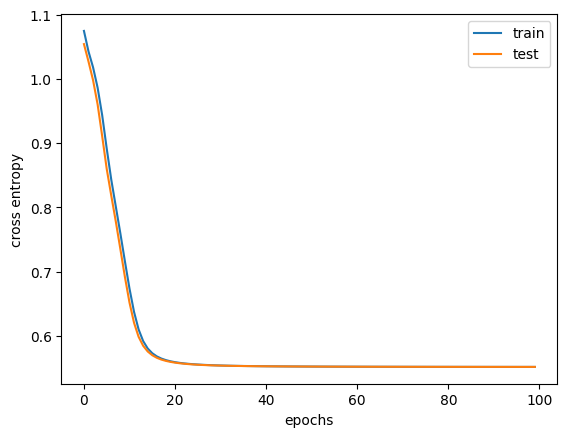

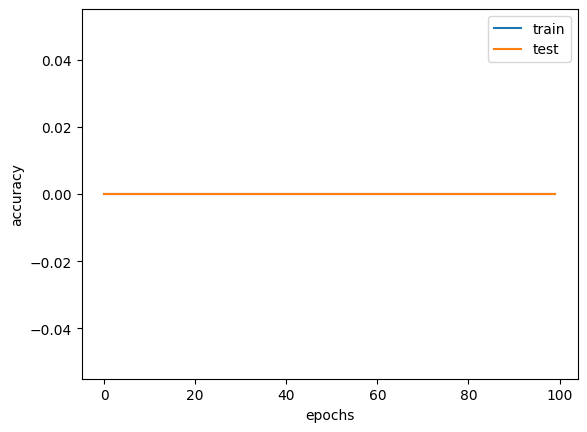

In [22]:
import matplotlib.pyplot as plt
 
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [23]:

#["FTHG","FTAG","B365H","B365D","B365A"]
X_new = np.array([[1.08,1.08,2.54,3.30,2.96]])
X_net = torch.FloatTensor(X_new)

In [24]:
from sklearn import preprocessing


torch.manual_seed(42)
# During inference or evaluation, apply softmax to obtain class probabilities
model.eval()
with torch.no_grad():
    prediction = model(X_net)

  # prediction = preprocessing.scale(prediction)

    print("Prediction of Games: {}".format(prediction))


# Assuming prediction is a 1D tensor with 3 elements
prediction_np = prediction.numpy().flatten()

# Calculate the differences
diff_12 = prediction_np[1] - prediction_np[0]
diff_23 = prediction_np[2] - prediction_np[1]
diff_31 = prediction_np[0] - prediction_np[2]

# Find the maximum and minimum
max_val = np.max(prediction_np)
min_val = np.min(prediction_np)

# Create a DataFrame
df = pd.DataFrame({
    'Difference home draw': [diff_12],
    'Difference draw away': [diff_23],
    'Difference away home': [diff_31],
    'Maximum': [max_val],
    'Minimum': [min_val]
})

print(df)

    

Prediction of Games: tensor([[0.4788, 0.2168, 0.3043]])
   Difference home draw  Difference draw away  Difference away home   Maximum  \
0             -0.262002              0.087469              0.174533  0.478845   

    Minimum  
0  0.216843  
